# Part I - Dataset Exploration Airline On-Time Performance Data
## by LARIANE Mohcene Mouad

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting pandas option to display all columns
pd.set_option('display.max_columns', None)

### Selecting a random sample from the dataset to work on 
Since the original dataset is too large ( + 7m rows ), I will do my study on only a random 1.5m records sample that was created in the ``Part_0_wrangling_and_creating_a_sub_sample_to_work_on.ipynb`` notebook where I've delt with the following issues :

- **Quality issues** : 
    - ``DepTime`` ``CRSDepTime`` ``ArrTime`` ``CRSArrTime`` fix these features values time format
    - Replace DayOfWeek values by the actual days names
    - Replace the bool features values by their actual values

- **Tidiness issues**:
    - ``Year`` ``Month`` ``DayofMonth`` should be in one column named ``Date``

I will work on this sample of 1.5m record instead of the original, in order to reduce execution time for this project.

### Loading clean dataset

In [3]:
flights = pd.read_csv('clean_flights_sample.csv')

In [4]:
flights.head()

Date DayOfWeek UniqueCarrier  FlightNum TailNum Origin Dest  \
0  2007-06-24    Sunday            XE       2773  N12946    EWR  GSO   
1  2007-05-07    Monday            OO       6154  N217SW    LAX  SNA   
2  2007-12-02    Sunday            AQ         48  N841AL    LIH  HNL   
3  2007-04-22    Sunday            OH       4983  N442CA    JFK  DCA   
4  2007-08-04  saturday            DL         65   N6702    ATL  TPA   

   Distance   DepTime CRSDepTime   ArrTime CRSArrTime  ActualElapsedTime  \
0       446  11:51:00   11:50:00  13:13:00   13:27:00               82.0   
1        36  18:13:00   18:15:00  18:44:00   18:54:00               31.0   
2       102  17:46:00   17:55:00  18:16:00   18:24:00               30.0   
3       213  16:30:00   16:20:00  17:53:00   17:50:00               83.0   
4       406  19:08:00   19:10:00  20:35:00   20:40:00               87.0   

   CRSElapsedTime  AirTime  ArrDelay  DepDelay  TaxiIn  TaxiOut Diverted  \
0            97.0     62.0     -14.0       1.0       4       16        0   
1            39.0     16.0     -10.0      -2.0       4       11        0   
2            29.0     24.0      -8.0      -9.0       2        4        0   
3            90.0     53.0       3.0      10.0       3       27        0   
4            90.0     57.0      -5.0      -2.0       4       26        0   

  Cancelled CancellationCode  CarrierDelay  WeatherDelay  NASDelay  \
0         0              NaN             0             0         0   
1         0              NaN             0             0         0   
2         0              NaN             0             0         0   
3         0              NaN             0             0         0   
4         0              NaN             0             0         0   

   SecurityDelay  LateAircraftDelay  
0              0                  0  
1              0                  0  
2              0                  0  
3              0                  0  
4              0                  0

In [5]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 27 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Date               1500000 non-null  object 
 1   DayOfWeek          1500000 non-null  object 
 2   UniqueCarrier      1500000 non-null  object 
 3   FlightNum          1500000 non-null  int64  
 4   TailNum            1499997 non-null  object 
 5   Origin             1500000 non-null  object 
 6   Dest               1500000 non-null  object 
 7   Distance           1500000 non-null  int64  
 8   DepTime            1500000 non-null  object 
 9   CRSDepTime         1500000 non-null  object 
 10  ArrTime            1500000 non-null  object 
 11  CRSArrTime         1500000 non-null  object 
 12  ActualElapsedTime  1464011 non-null  float64
 13  CRSElapsedTime     1499807 non-null  float64
 14  AirTime            1464011 non-null  float64
 15  ArrDelay           1464011 non-n

**Fixing features types**

In [6]:
flights['Date'] = pd.to_datetime(flights['Date'])

## Univariate Exploration

#### Question
When do people most travel the most ?
> Note: This dataset contains flight records for 2007 only, so there will be no need to make observation on the year in the date feature

#### Sub-Question
What month do people prefer to travel ?

#### Visualization

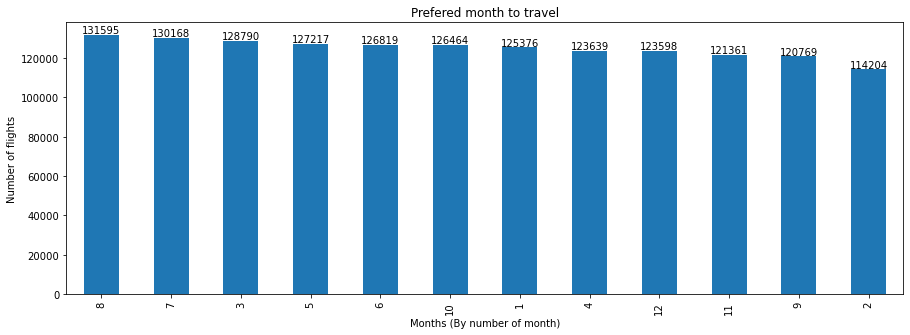

In [7]:
freq = flights.Date.dt.month.value_counts()
ind = freq.index
plt.figure(figsize=(15, 5))

freq.plot(kind='bar')
ax_ind = np.arange(1, 13, 1)
for i, ax_i in zip(ind, ax_ind):
    count = freq[i]
    plt.text(ax_i-1, count+5000, count, ha = 'center', va='top') 
plt.title('Prefered month to travel')
plt.xlabel('Months (By number of month)')
plt.ylabel('Number of flights')
plt.show()

#### Observation
The most prefered months to travel are **July** and **August** which was expectable, because people tend to travel a lot during summer vacation. Also the 2nd most prefered period to travel is during **March**, **April**, **May** which does makes sense because it the spring season period where the weather is fine.
The least prefered month to travel in is **Fabuary** which does also makes sense because it's basically the period when everyone is either working or studying.

#### Sub-Question
What month days do people prefer to travel ?

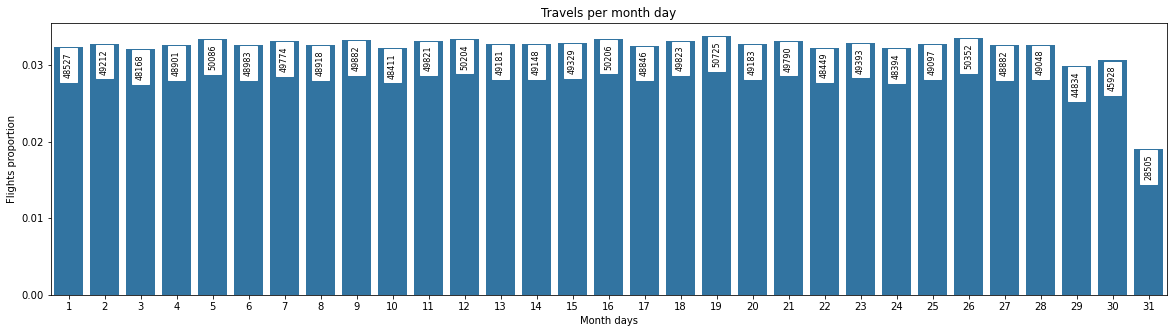

In [8]:
plt.figure(figsize = [20, 5])
freq = flights.Date.dt.day.value_counts()
ind = freq.index
n = freq.sum()
max_travel_count = freq.values[0]
max_prop = max_travel_count/n
tick_props = np.arange(0, max_prop, 0.01)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
base_color = sb.color_palette()[0]
sb.countplot(x=flights['Date'].dt.day, color=base_color)

ax_ind = np.arange(1, 32, 1)
for i in ind:
    count = freq[i]
    plt.text(i-1, count-1000, count, ha = 'center', va='top', rotation=90, color='Black', size=8, backgroundcolor='#FFFFFF') 
    
plt.yticks(tick_props * n, tick_names) 
plt.ylabel('Flights proportion')
plt.title('Travels per month day')
plt.xlabel('Month days')

plt.show()

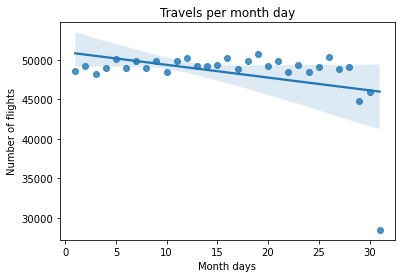

In [9]:
plt.figure()
sb.regplot(x=ind, y=freq.values, fit_reg=True, y_jitter=0.8)
plt.title('Travels per month day')
plt.xlabel('Month days')
plt.ylabel('Number of flights')
plt.show()

#### Observation
Number of flights decreases at the end of the month (from 29th to 31th), which means that people travel less at this period.
The 31th can be ignored since not all months have 31 days. Also from another perspective since only 7 months have 31 days and we've 29k flight records in the 31th, this means that people do actualy travel often on 31th. Therefore we can remove 31th from our list of month days the people travel the least, which leave us with only 29th, and 30th as final result.

In [10]:
# Dropping month day 31
flights.drop(flights.query('Date.dt.day == 31').index, inplace=True)

#### Sub-Question
What week days do people prefer to travel ?

#### Visualization

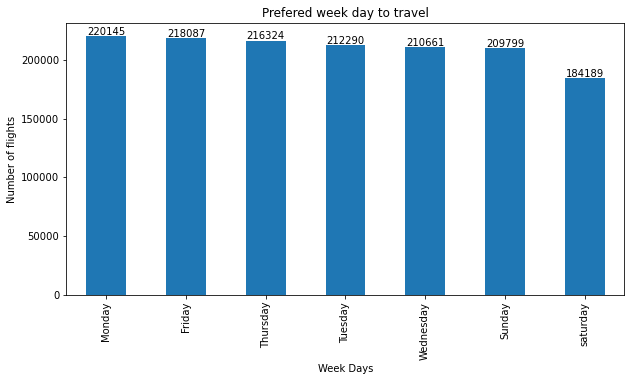

In [11]:
freq = flights.DayOfWeek.value_counts()
ind = freq.index
plt.figure(figsize=(10, 5))
freq.plot(kind='bar')
ax_ind = np.arange(1, 8, 1)
for day, ax_i in zip(ind, ax_ind):
    count = freq[day]
    plt.text(ax_i-1, count+8000, count, ha = 'center', va='top') 
plt.title('Prefered week day to travel')
plt.xlabel('Week Days')
plt.ylabel('Number of flights')
plt.show()

#### Observation
**Monday, Friday, Thursday** are the most prefered days to travel. **Friday** and **Monday** are weekend days which explains why they're are the two best week days to traval in, other week days with a high number of flights record such as **Thursday and Wednesday** are reasonable too, where people such as employees for instance can also take business trips.

#### Question
what carries dominate the airline ?

#### Visualization

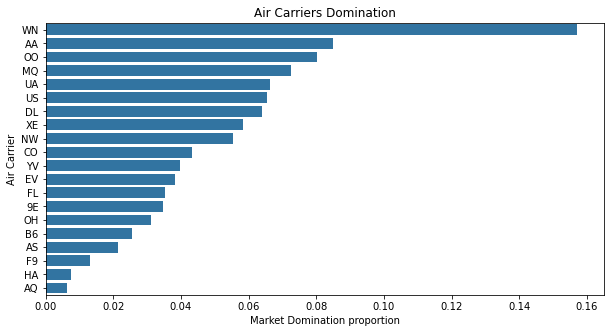

In [12]:
plt.figure(figsize=(10, 5))
freq = flights.UniqueCarrier.value_counts()
o = freq.index
n = freq.sum()
max_type_count = freq[0]
max_prop = max_type_count/n
tick_props = np.arange(0, max_prop+0.02, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
sb.countplot(data=flights, y='UniqueCarrier', color=base_color, order=o);
plt.xticks(tick_props * n, tick_names) 
plt.xlabel('Market Domination proportion')
plt.ylabel('Air Carrier')
plt.title('Air Carriers Domination')
plt.show()

#### Observation
Southwest Airlines dominates the market, where it covers 16% of it, x2 ahead from its best competitor which is The American Airlines.

source : [Carrier Codes and Names](https://aspm.faa.gov/aspmhelp/index/ASQP__Carrier_Codes_and_Names.html)

#### Question
The location(s) that people travel from/To the most ?

#### Visualization

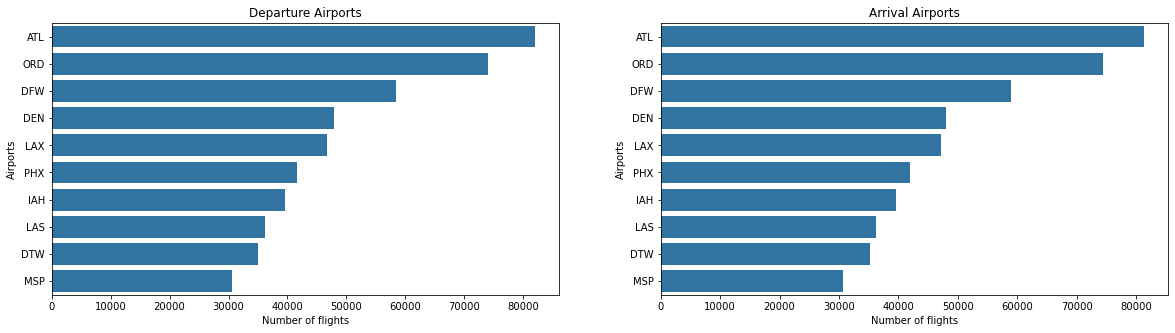

In [13]:
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
best_origins = flights.Origin.value_counts().head(10).index
flights_best_origins = flights.query('Origin in @best_origins')
base_color = sb.color_palette()[0]
sb.countplot(data=flights_best_origins, y='Origin', color=base_color, order=best_origins)
plt.title('Departure Airports')
plt.xlabel('Number of flights')
plt.ylabel('Airports')

plt.subplot(1, 2, 2)
best_dest = flights.Dest.value_counts().head(10).index
flights_best_dest = flights.query('Dest in @best_dest')
base_color = sb.color_palette()[0]
sb.countplot(data=flights_best_dest, y='Dest', color=base_color, order=best_dest)
plt.title('Arrival Airports')
plt.xlabel('Number of flights')
plt.ylabel('Airports')
plt.show()

#### Observation
The three airports with the most outgoing and incoming number of flights are :
- Hartsfield–Jackson Atlanta International Airport
- Chicago O'Hare International Airport
- Dallas Fort Worth International Airport

Therefore the locations that people travel from/to the most are :
- Atlanta
- Chocago
- Dallas

> Note: These three US cities are the most three active air traffic cities in our records

#### Question
At what time do most flights take-off ?

#### Visualization

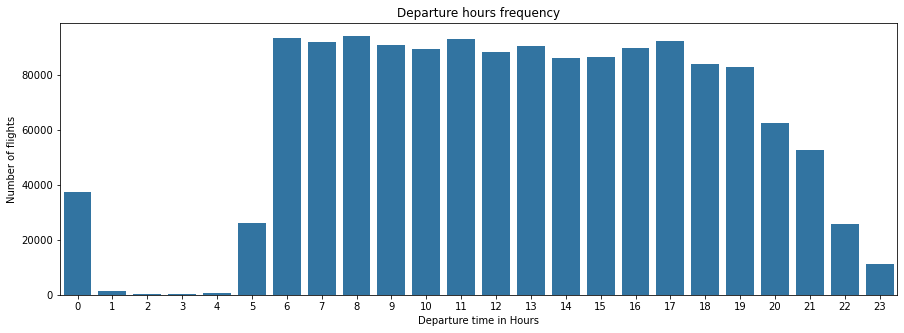

In [14]:
plt.figure(figsize=(15, 5))
sb.countplot(x=flights.DepTime.str[0:2].astype('int'), color=base_color)
plt.title('Departure hours frequency')
plt.xlabel('Departure time in Hours')
plt.ylabel('Number of flights')
plt.show()

#### Observation
Most flights take-off from 6am to 7pm

#### Question
At what time most flights are scheduled to Take-Off ?

#### Visualization

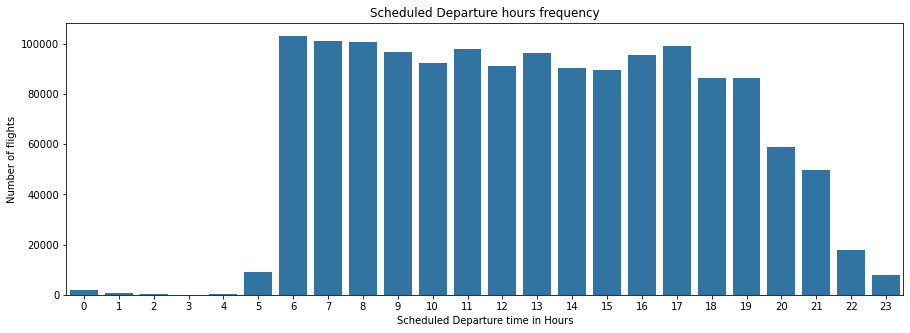

In [15]:
plt.figure(figsize=(15, 5))
sb.countplot(x=flights.CRSDepTime.str[0:2].astype('int'), color=base_color)
plt.title('Scheduled Departure hours frequency')
plt.xlabel('Scheduled Departure time in Hours')
plt.ylabel('Number of flights')
plt.show()

#### Observation
Most flights are scheduled to take-off from 6am to 7pm

#### Question
At what time most flights land/Arrive ?

#### Visualization

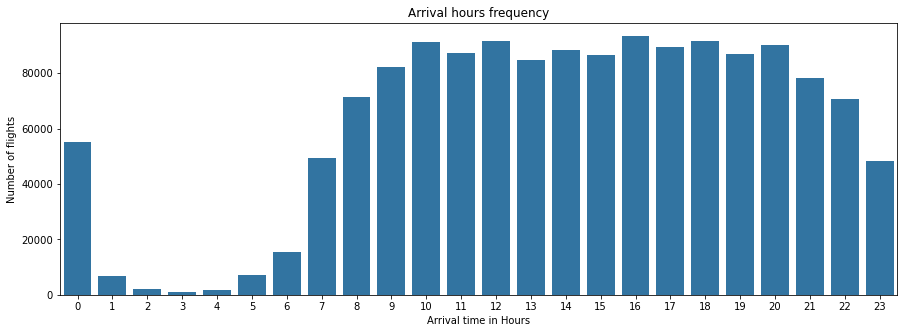

In [16]:
plt.figure(figsize=(15, 5))
sb.countplot(x=flights.ArrTime.str[0:2].astype('int'), color=base_color)
plt.title('Arrival hours frequency')
plt.xlabel('Arrival time in Hours')
plt.ylabel('Number of flights')
plt.show()

#### Observation
Most flights land/Arrive from 6am to midnight

#### Question
At what time most flights are scheduled to land/Arrive ?

#### Visualization

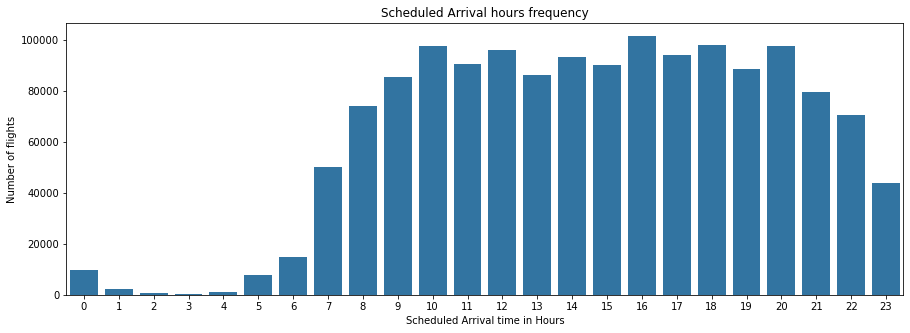

In [17]:
plt.figure(figsize=(15, 5))
sb.countplot(x=flights.CRSArrTime.str[0:2].astype('int'), color=base_color)
plt.title('Scheduled Arrival hours frequency')
plt.xlabel('Scheduled Arrival time in Hours')
plt.ylabel('Number of flights')
plt.show()

#### Observation
Most flights are scheduled to arrive from 7am-8am to 11pm

#### Question
How much time do these flights take to reach their destination ?

#### Visualization

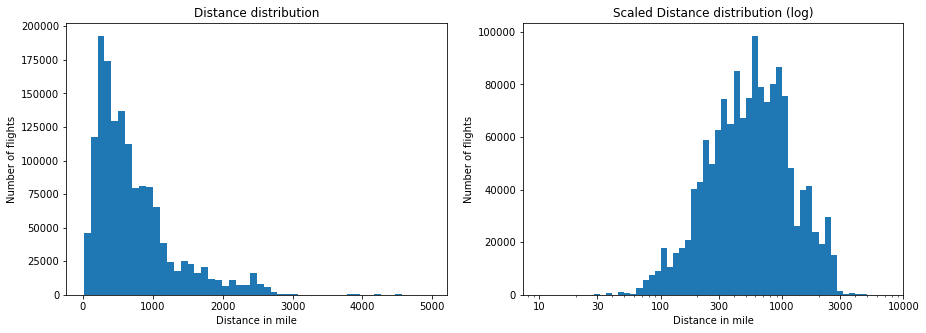

In [18]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
bins = np.arange(0, flights['Distance'].max()+100, 100)
plt.hist(data = flights, x = 'Distance', bins = 50)
plt.title('Distance distribution')
plt.xlabel('Distance in mile')
plt.ylabel('Number of flights')

plt.subplot(1, 2, 2)
bins = 10 ** np.arange(1, 3.7+0.05, 0.05)
ticks = [10, 30, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=flights, x='Distance', bins=bins);
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Scaled Distance distribution (log)')
plt.xlabel('Distance in mile')
plt.ylabel('Number of flights')

plt.show()

**Taking a deeper look of distance values greater than 3000 miles**

In [19]:
len(flights.query('Distance > 3000'))

2173

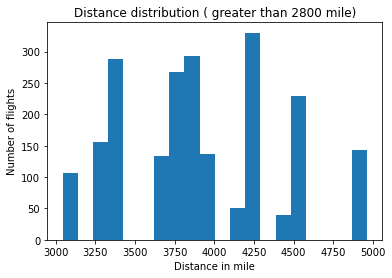

In [20]:
##### plt.figure(figsize=(5, 5))
plt.hist(data = flights.query('Distance > 3000'), x = 'Distance', bins = 20);
plt.title('Distance distribution ( greater than 2800 mile)')
plt.xlabel('Distance in mile')
plt.ylabel('Number of flights')
plt.show()

#### Observation
The histogram is right skewed, where most distances are between 100-3000 miles, and a relatively small number of flights (2214) with a distance greater than 3000 miles

#### Question
How long do flights would take (Actual Elapsed Time) to reach their destination ?

#### Visualization

In [21]:
flights.ActualElapsedTime.describe()

count    1.436002e+06
mean     1.261941e+02
std      7.105571e+01
min      1.500000e+01
25%      7.600000e+01
50%      1.080000e+02
75%      1.560000e+02
max      1.270000e+03
Name: ActualElapsedTime, dtype: float64

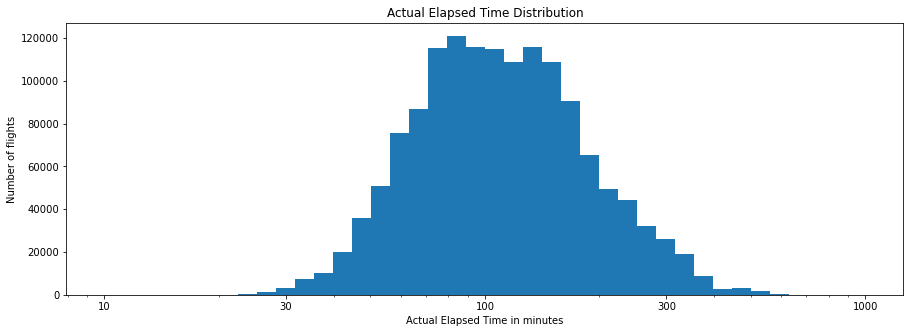

In [22]:
plt.figure(figsize=(15, 5))
bins = 10 ** np.arange(1, 3+0.05, 0.05)
ticks = [10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=flights, x='ActualElapsedTime', bins=bins);
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Actual Elapsed Time Distribution')
plt.xlabel('Actual Elapsed Time in minutes')
plt.ylabel('Number of flights')
plt.show()

#### Observation

> Normal distribution, Most flights take between 30-300 minutes (half an hour to 5 hours) to arrive to their destination

**Taking a deeper look of flights with values Actual Elapsed Time greater than 600 minutes**

#### Visualization

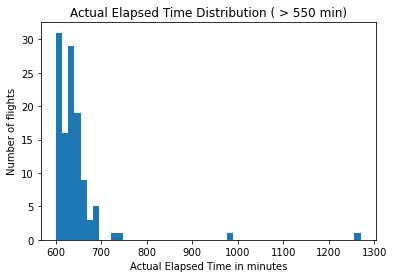

In [23]:
plt.figure()
flights.query('ActualElapsedTime > 600').ActualElapsedTime.plot(kind='hist', bins=50)
plt.title('Actual Elapsed Time Distribution ( > 550 min)')
plt.xlabel('Actual Elapsed Time in minutes')
plt.ylabel('Number of flights')
plt.show()

In [24]:
# Number of flights with ActualElapsedTime greater than 600 minutes
len(flights.query('ActualElapsedTime > 600'))

116

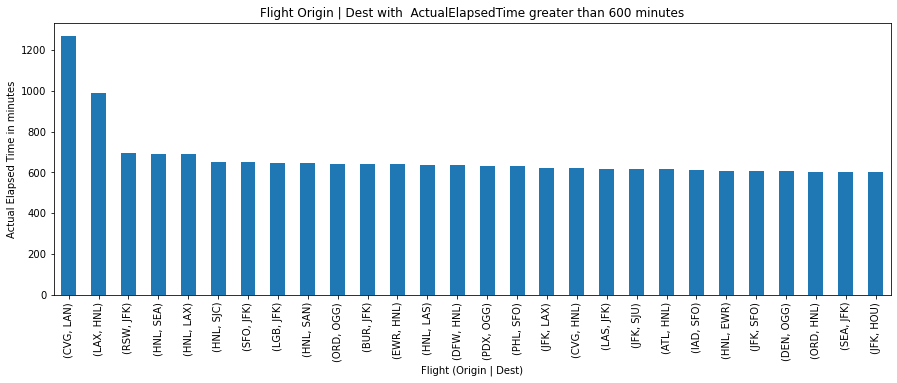

In [25]:
plt.figure(figsize=(15, 5))
flights.query('ActualElapsedTime > 600').groupby(['Origin', 'Dest'])['ActualElapsedTime'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Flight Origin | Dest with  ActualElapsedTime greater than 600 minutes')
plt.xlabel('Flight (Origin | Dest)')
plt.ylabel('Actual Elapsed Time in minutes')
plt.show()

#### Observation

> 118 flights take from 600 minutes ( 10 hours ) to 700 minutes ( 11.5 hours ) and 2 flight from 700 minutes ( 11.5 hours ) to 800 minutes ( 13 hours ) to reach their destination  these flight's Origin and destination are very far away from each others which explains why they take this long to reach to their destination. Because such long flights do many stopovers

In [26]:
flights.query('ActualElapsedTime > 800').groupby(['Origin', 'Dest'])['ActualElapsedTime'].mean()

Origin  Dest
CVG     LAN     1270.0
LAX     HNL      989.0
Name: ActualElapsedTime, dtype: float64

In [27]:
flights.query('ActualElapsedTime > 800')

Date DayOfWeek UniqueCarrier  FlightNum TailNum Origin Dest  \
1172615 2007-01-26    Friday            OH       5640  N510CA    CVG  LAN   
1221604 2007-05-08   Tuesday            HA          1  N593HA    LAX  HNL   

         Distance   DepTime CRSDepTime   ArrTime CRSArrTime  \
1172615       258  20:56:00   20:56:00  18:06:00   21:57:00   
1221604      2556  08:57:00   08:25:00  01:26:00   10:55:00   

         ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  DepDelay  \
1172615             1270.0            61.0   1257.0    1209.0       0.0   
1221604              989.0           150.0    966.0     871.0      32.0   

         TaxiIn  TaxiOut Diverted Cancelled CancellationCode  CarrierDelay  \
1172615       3       10        0         0              NaN             0   
1221604       5       18        0         0              NaN           853   

         WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
1172615             0      1209              0                  0  
1221604             0         0              0                 18

#### Observation

> CVG, LAN  flight and LAX, HNL are the top two long flights (outliers)

#### Question
How long do flights are scheduled (Scheduled Elapsed Time) to reach their destination ?

#### Visualization

In [28]:
flights.CRSElapsedTime.describe()

count    1.471303e+06
mean     1.271099e+02
std      7.023336e+01
min     -1.240000e+03
25%      7.700000e+01
50%      1.100000e+02
75%      1.560000e+02
max      1.430000e+03
Name: CRSElapsedTime, dtype: float64

> It looks like we've some sort of negative values, where we're supposed to have only positive values

In [29]:
# Investigating
flights.query('CRSElapsedTime < 0')

Date DayOfWeek UniqueCarrier  FlightNum TailNum Origin Dest  \
61661 2007-01-16   Tuesday            B6       1069       0    JFK  AUS   

       Distance   DepTime CRSDepTime   ArrTime CRSArrTime  ActualElapsedTime  \
61661      1522  00:00:00   20:50:00  00:00:00   00:00:00                NaN   

       CRSElapsedTime  AirTime  ArrDelay  DepDelay  TaxiIn  TaxiOut Diverted  \
61661         -1240.0      NaN       NaN       NaN       0        0        0   

      Cancelled CancellationCode  CarrierDelay  WeatherDelay  NASDelay  \
61661       Yes                A             0             0         0   

       SecurityDelay  LateAircraftDelay  
61661              0                  0

> Looks like that CRSElapsedTime value for this row is inaccurate and must be dropped

In [30]:
flights.drop(index=61661, inplace=True)

#### Scaling on the x axis for a better plot

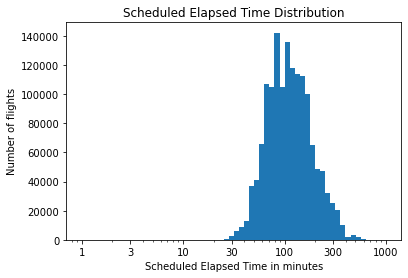

In [31]:
bins = 10 ** np.arange(0, 3+0.05, 0.05)
ticks = [1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=flights, x='CRSElapsedTime', bins=bins);
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('Scheduled Elapsed Time Distribution')
plt.xlabel('Scheduled Elapsed Time in minutes')
plt.ylabel('Number of flights')
plt.show()

#### Observation

> Normal distribution where most flights have a scheduled elapsed time between 30 min to 300 minutes ( half an hour to 5 hours ) 

In [32]:
len(flights.query('CRSElapsedTime < 30'))

2752

In [33]:
flights.query('CRSElapsedTime < 30')['Distance'].mean()

113.48364825581395

#### Observation

> Only 2817 flights have a scheduled elapsed time less than 30 minutes, these flights covers an average distance of about 113 mile

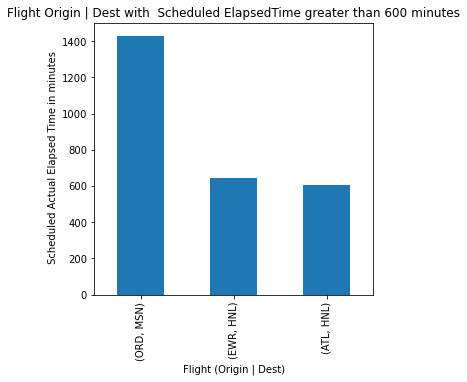

In [34]:
plt.figure(figsize=(5, 5))
flights.query('CRSElapsedTime > 600').groupby(['Origin', 'Dest'])['CRSElapsedTime'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Flight Origin | Dest with  Scheduled ElapsedTime greater than 600 minutes')
plt.xlabel('Flight (Origin | Dest)')
plt.ylabel(' Scheduled Actual Elapsed Time in minutes')
plt.show()

> Only EWR, HNL and ATL, HNL take about 600 minutes ( 10 hours ) to reach their destination, which makes sence because these two flights origine cities are close to each others (Newark , Atlanta in the US) and their destination is the same ( Hawaii ).


In [35]:
flights.query('CRSElapsedTime > 800')

Date DayOfWeek UniqueCarrier  FlightNum TailNum Origin Dest  \
279838 2007-10-18  Thursday            MQ       4127       0    ORD  MSN   

        Distance   DepTime CRSDepTime   ArrTime CRSArrTime  ActualElapsedTime  \
279838       109  00:00:00   18:50:00  00:00:00   19:40:00                NaN   

        CRSElapsedTime  AirTime  ArrDelay  DepDelay  TaxiIn  TaxiOut Diverted  \
279838          1430.0      NaN       NaN       NaN       0        0        0   

       Cancelled CancellationCode  CarrierDelay  WeatherDelay  NASDelay  \
279838       Yes                C             0             0         0   

        SecurityDelay  LateAircraftDelay  
279838              0                  0

#### Observation


> ORD, MSN flight is considered the flight with the longest scheduled time in our records (outlier) , while these too cities are so close of each others ( Both and the US and the distance between them is 109 mile ) and the flight had no delays. Therefore the CRSElapsedTime value is wrong (inaccurate) ans should be fixed/dropped.

In [36]:
flights.drop(index=279838, inplace=True)

#### Question
How long do flights take in the air (AirTime) to reach their destination ?

#### Visualization

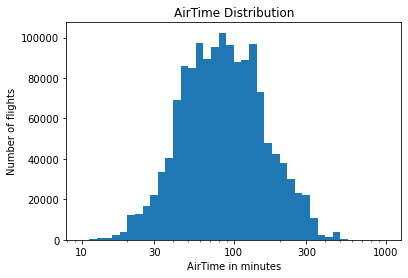

In [37]:
bins = 10 ** np.arange(1, 3+0.05, 0.05)
ticks = [10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=flights, x='AirTime', bins=bins);
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('AirTime Distribution')
plt.xlabel('AirTime in minutes')
plt.ylabel('Number of flights')
plt.show()

#### Observation

> Most flights take less than 200 minutes in the air (3.5 hours) which are considered short flights. also a considerable number of flights takes between 200 minutes to 400 minutes (3.5 - 6.5 hours) in the air

In [38]:
len(flights.query('AirTime > 400'))

5804

#### Observation

> 5903 flights take more than 400 minutes (6.5 hours) in the air

In [39]:
flights.query('AirTime > 800')

Date DayOfWeek UniqueCarrier  FlightNum TailNum Origin Dest  \
1172615 2007-01-26    Friday            OH       5640  N510CA    CVG  LAN   
1221604 2007-05-08   Tuesday            HA          1  N593HA    LAX  HNL   

         Distance   DepTime CRSDepTime   ArrTime CRSArrTime  \
1172615       258  20:56:00   20:56:00  18:06:00   21:57:00   
1221604      2556  08:57:00   08:25:00  01:26:00   10:55:00   

         ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  DepDelay  \
1172615             1270.0            61.0   1257.0    1209.0       0.0   
1221604              989.0           150.0    966.0     871.0      32.0   

         TaxiIn  TaxiOut Diverted Cancelled CancellationCode  CarrierDelay  \
1172615       3       10        0         0              NaN             0   
1221604       5       18        0         0              NaN           853   

         WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
1172615             0      1209              0                  0  
1221604             0         0              0                 18

#### Observation

> LAX, HNL flight takes the longest AirTime, which confirms the results found when exploring ``ActualElapsedTime`` feature

#### Question
How many flights arrive late/early ?

#### Visualization

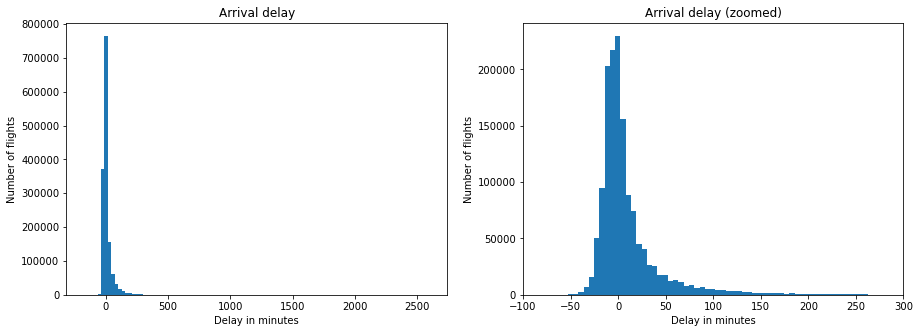

In [40]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(data=flights, x='ArrDelay', bins=100)
plt.title('Arrival delay')
plt.xlabel('Delay in minutes')
plt.ylabel('Number of flights')

plt.subplot(1, 2, 2)
plt.hist(data=flights, x='ArrDelay', bins=500)
plt.title('Arrival delay (zoomed)')
plt.xlabel('Delay in minutes')
plt.ylabel('Number of flights')
plt.xlim((-100, 300))
plt.show()


#### Observation
> Normal distribution, which means that flights arrive late and early almost equaly, where most values are between -50 minutes (50min early arrival) and 100 minutes late

**Applying logarithmic transformation on the x axis**

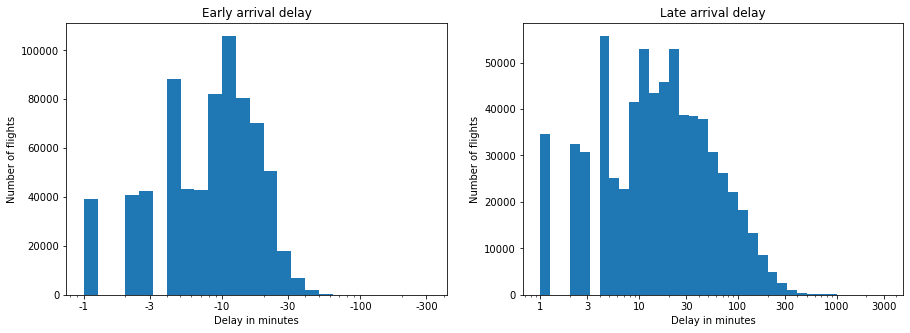

In [41]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
rev_values = -1 * (flights.query('ArrDelay <= 0').ArrDelay)
bins = 10 ** np.arange(0, 2.5+0.1, 0.1)
ticks = [1, 3, 10, 30, 100, 300]
labels = ['-{}'.format(v) for v in ticks]
plt.hist(rev_values, bins=bins)
plt.title('Early arrival delay')
plt.xlabel('Delay in minutes')
plt.ylabel('Number of flights')
plt.xscale('log')
plt.xticks(ticks, labels)


plt.subplot(1, 2, 2)
values = flights.query('ArrDelay >= 0').ArrDelay
bins = 10 ** np.arange(0, 3.5+0.1, 0.1)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(values, bins=bins)
plt.title('Late arrival delay')
plt.xlabel('Delay in minutes')
plt.ylabel('Number of flights')
plt.xscale('log')
plt.xticks(ticks, labels)

plt.show()


#### Observation

> **Early arrival** : flights tend to arrive 5-30 minutes earlier than the Scheduled arrival time

> **Late arrival** : right skewed histogram, flights tend to arrive 5-300 minutes late

**Outliers**

In [42]:
flights.query('ArrDelay < -100')

Date DayOfWeek UniqueCarrier  FlightNum TailNum Origin Dest  \
1485677 2007-07-06    Friday            EV       4397  N861AS    CHA  ATL   

         Distance   DepTime CRSDepTime   ArrTime CRSArrTime  \
1485677       106  06:00:00   08:45:00  06:38:00   09:33:00   

         ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  DepDelay  \
1485677               38.0            48.0     20.0    -175.0    -165.0   

         TaxiIn  TaxiOut Diverted Cancelled CancellationCode  CarrierDelay  \
1485677       7       11        0         0              NaN             0   

         WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
1485677             0         0              0                  0

In [43]:
flights.query('ArrDelay > 500').head()

Date DayOfWeek UniqueCarrier  FlightNum TailNum Origin Dest  \
1669  2007-10-08    Monday            EV       4838  N842AS    BMI  ATL   
11116 2007-09-08  saturday            AA       1290  N3BKAA    STX  MIA   
14061 2007-11-25    Sunday            XE       3031  N11127    GSO  IAH   
19091 2007-07-09    Monday            9E       5780  87839E    CLT  MEM   
24321 2007-02-15  Thursday            B6       1603  N192JB    PWM  JFK   

       Distance   DepTime CRSDepTime   ArrTime CRSArrTime  ActualElapsedTime  \
1669        533  22:45:00   13:54:00  01:15:00   16:44:00               90.0   
11116      1139  09:13:00   15:45:00  11:54:00   18:40:00              161.0   
14061       986  20:44:00   06:30:00  22:47:00   08:35:00              183.0   
19091       512  08:02:00   17:10:00  09:13:00   17:50:00              131.0   
24321       274  20:33:00   11:10:00  21:50:00   12:35:00               77.0   

       CRSElapsedTime  AirTime  ArrDelay  DepDelay  TaxiIn  TaxiOut Diverted  \
1669            110.0     73.0     511.0     531.0       7       10        0   
11116           175.0    147.0    1034.0    1048.0       4       10        0   
14061           185.0    155.0     852.0     854.0      14       14        0   
19091           100.0     92.0     923.0     892.0       9       30        0   
24321            85.0     61.0     555.0     563.0       9        7        0   

      Cancelled CancellationCode  CarrierDelay  WeatherDelay  NASDelay  \
1669          0              NaN           511             0         0   
11116         0              NaN          1011             0         0   
14061         0              NaN           852             0         0   
19091         0              NaN           892             0        31   
24321         0              NaN             4             0         0   

       SecurityDelay  LateAircraftDelay  
1669               0                  0  
11116              0                 23  
14061              0                  0  
19091              0                  0  
24321              0                551

### Doing some stats

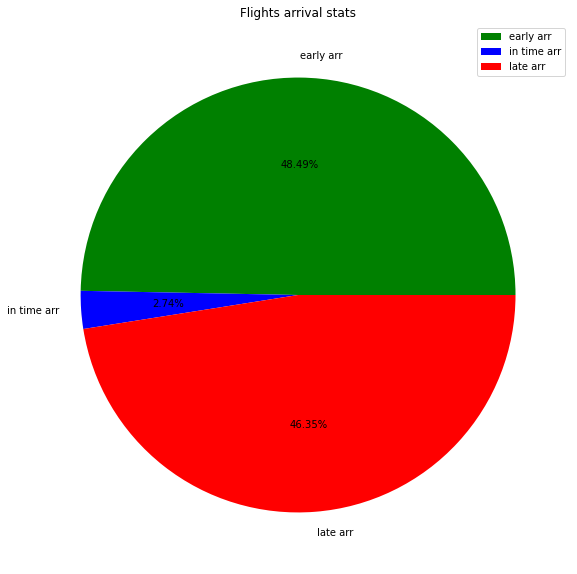

In [44]:
plt.figure(figsize=(10, 10))

early_arr = round(len(flights.query('ArrDelay < 0'))/(len(flights)), 4)*100
in_time_arr = round(len(flights.query('ArrDelay == 0'))/(len(flights)), 4)*100
late_arr = round(len(flights.query('ArrDelay > 0'))/(len(flights)), 4)*100

labels = 'early arr', 'in time arr', 'late arr'
sizes = [early_arr, in_time_arr, late_arr]
colors = ['green', 'blue', 'red']

p, tx, autotexts = plt.pie(sizes, labels=labels, colors=colors,
        autopct="")
for i, a in enumerate(autotexts):
    a.set_text("{}%".format(sizes[i]))
plt.title('Flights arrival stats')
plt.legend()
plt.show()

#### Observation 
Only 2.74% of the flights arrive in time which indicates that flights rarely arrive exactly in time, where the number of flights with early arrival is slightly higher than flights with late arrival.

#### Question
How many flights leave late/early ? 

#### Visualization

In [45]:
flights.DepDelay.describe()

count    1.439401e+06
mean     1.142934e+01
std      3.612725e+01
min     -1.650000e+02
25%     -4.000000e+00
50%      0.000000e+00
75%      1.100000e+01
max      2.601000e+03
Name: DepDelay, dtype: float64

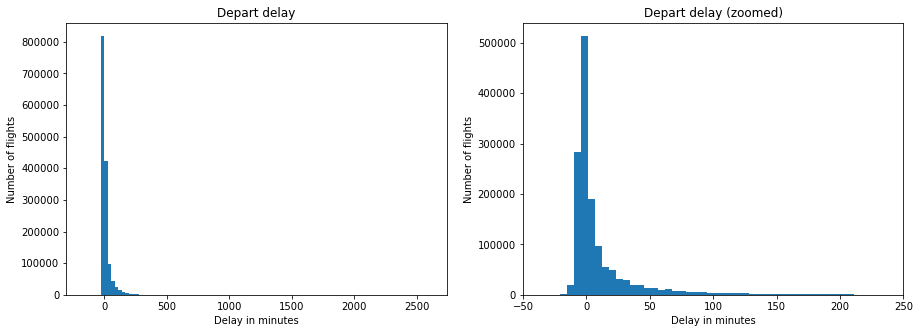

In [46]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(data=flights, x='DepDelay', bins=100)
plt.title('Depart delay')
plt.xlabel('Delay in minutes')
plt.ylabel('Number of flights')

plt.subplot(1, 2, 2)
plt.hist(data=flights, x='DepDelay', bins=500)
plt.title('Depart delay (zoomed)')
plt.xlabel('Delay in minutes')
plt.ylabel('Number of flights')
plt.xlim((-50, 250))
plt.show()


#### Observation
> slightly right skewed, which means that the number of flights that leave early is slightly higher than the number of flights that leave late

**Applying logarithmic transformation on the x axis**

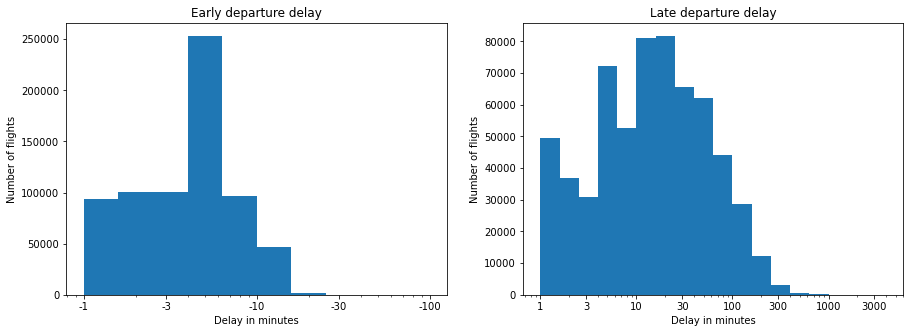

In [47]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
rev_values = -1 * (flights.query('DepDelay <= 0').DepDelay)
bins = 10 ** np.arange(0, 2+0.2, 0.2)
ticks = [1, 3, 10, 30, 100]
labels = ['-{}'.format(v) for v in ticks]
plt.hist(rev_values, bins=bins)
plt.title('Early departure delay')
plt.xlabel('Delay in minutes')
plt.ylabel('Number of flights')
plt.xscale('log')
plt.xticks(ticks, labels)


plt.subplot(1, 2, 2)
values = flights.query('DepDelay >= 0').DepDelay
bins = 10 ** np.arange(0, 3.5+0.2, 0.2)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(values, bins=bins)
plt.title('Late departure delay')
plt.xlabel('Delay in minutes')
plt.ylabel('Number of flights')
plt.xscale('log')
plt.xticks(ticks, labels)

plt.show()


#### Observation

> **Early arrival** : Unimodel distribution, where flights leave 1-30minutes max early

> **Late arrival** : Non symetric unimodel, where flights leave 1min-5hours late

### Doing some stats

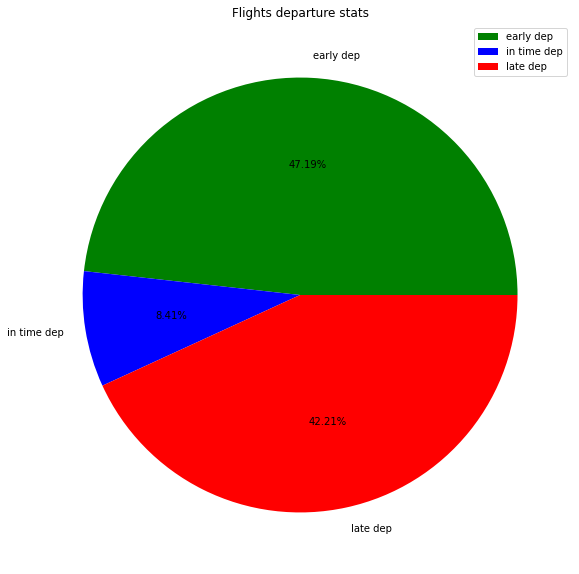

In [48]:
plt.figure(figsize=(10, 10))

early_dep = round(len(flights.query('DepDelay < 0'))/(len(flights)), 4)*100
in_time_dep = round(len(flights.query('DepDelay == 0'))/(len(flights)), 4)*100
late_dep = round(len(flights.query('DepDelay > 0'))/(len(flights)), 4)*100

labels = 'early dep', 'in time dep', 'late dep'
sizes = [early_dep, in_time_dep, late_dep]
colors = ['green', 'blue', 'red']

p, tx, autotexts = plt.pie(sizes, labels=labels, colors=colors,
        autopct="")
for i, a in enumerate(autotexts):
    a.set_text("{}%".format(sizes[i]))
plt.title('Flights departure stats')
plt.legend()
plt.show()

#### Observation 
Only 8.41% of the flights leave in time which indicates that flights rarely leave in time, where the number of flights with early departure is slightly higher than flights with late departure.

#### Question
How many flights were cancelled ?

> **Important Note**: since I've done the data wrangling in another notebook, and I've made a mistake replacing boolean values in the dataset, I won't be able to fix the code in that notebook, because the sample that we're working on already created (fixing that code and re-run that notebook will create a whole different random sample that would be different from the current sample we're working on ( different potential results ), therefore to solve this simple problem I'll replace the values in this notebook instead and carry on with my analysis.

#### Fixing the issue

In [49]:
# Actual values 1 = Yes , 0 = No
# Old wrong code : bool_values = {1: 'Yes', 0:'No'}
bool_values = {'0':'No'}
flights.Cancelled.replace(bool_values, inplace=True)

#### Test

In [50]:
flights.Cancelled.unique()

array(['No', 'Yes'], dtype=object)

#### Visualization

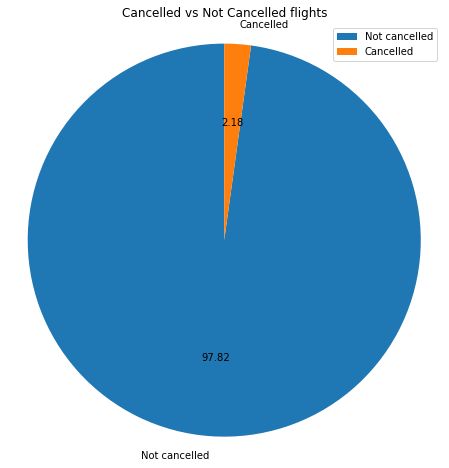

In [51]:
plt.figure(figsize=(8, 8))
labels = ['Not cancelled', 'Cancelled']
plt.pie(flights.Cancelled.value_counts()
        , labels = labels,autopct='%.2f' ,startangle = 90);
plt.axis('square')
plt.title('Cancelled vs Not Cancelled flights')
plt.legend()
plt.show()

#### Observation
Only 2.17% of the flights were cancelled

#### Question
How many flights were diverted ?

> **Important Note**: Same as the previous issue

#### Fixing the issue

In [52]:
# Actual values 1 = Yes , 0 = No
# Old wrong code : bool_values = {1: 'Yes', 0:'No'}
bool_values = {'0':'No'}
flights.Diverted.replace(bool_values, inplace=True)

#### Test

In [53]:
flights.Diverted.unique()

array(['No', 'Yes'], dtype=object)

#### Visualization

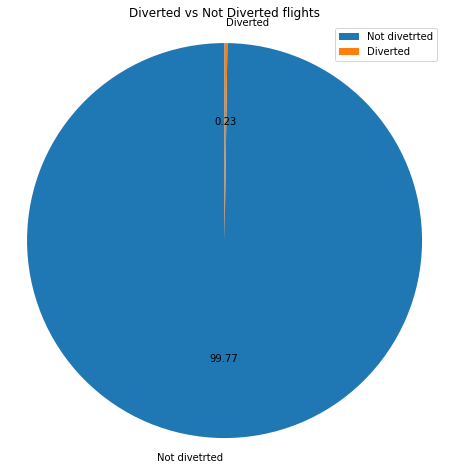

In [54]:
plt.figure(figsize=(8, 8))
labels = ['Not divetrted', 'Diverted']
plt.pie(flights.Diverted.value_counts()
        , labels = labels,autopct='%.2f' ,startangle = 90);
plt.axis('square')
plt.title('Diverted vs Not Diverted flights')
plt.legend()
plt.show()

#### Observation
Only 0.23% of the flights were diverted

#### Question
Because of what do flights get cancelled the most ?

#### Renaming values : 
A = carrier, B = weather, C = NAS, D = security

In [55]:
rep_val = {'A':'Carrier', 'B':'Weather', 'C':'NAS', 'D':'Security'}
flights.CancellationCode.replace(rep_val, inplace=True)

In [56]:
flights.CancellationCode.unique()

array([nan, 'Weather', 'NAS', 'Carrier', 'Security'], dtype=object)

#### Visualization

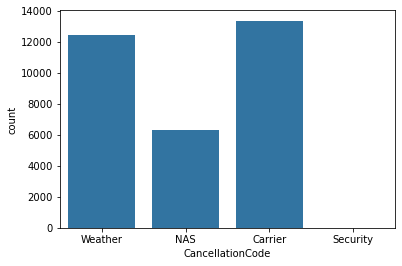

In [57]:
freq = flights.CancellationCode.value_counts()
ind = freq.index
base_color = sb.color_palette()[0]
sb.countplot(data=flights, x='CancellationCode', color=base_color);   

In [58]:
flights.query('CancellationCode == "Security"')

Date DayOfWeek UniqueCarrier  FlightNum TailNum Origin Dest  \
106796  2007-07-12  Thursday            YV       7082  N446YV    COD  DEN   
216859  2007-04-16    Monday            WN        400       0    BWI  PVD   
315949  2007-04-16    Monday            WN       1166       0    PVD  MDW   
584033  2007-06-30  saturday            OO       5664       0    MRY  SFO   
956849  2007-04-05  Thursday            OH       5274       0    RDU  JFK   
1100243 2007-04-16    Monday            WN       1839       0    MDW  PVD   
1256180 2007-04-16    Monday            WN       2221       0    PVD  MDW   

         Distance   DepTime CRSDepTime   ArrTime CRSArrTime  \
106796        392  00:00:00   13:27:00  00:00:00   15:18:00   
216859        328  00:00:00   07:50:00  00:00:00   09:00:00   
315949        842  00:00:00   07:40:00  00:00:00   09:15:00   
584033         77  00:00:00   17:25:00  00:00:00   17:58:00   
956849        426  00:00:00   16:50:00  00:00:00   18:35:00   
1100243       842  00:00:00   07:30:00  00:00:00   10:35:00   
1256180       842  00:00:00   09:50:00  00:00:00   11:20:00   

         ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  DepDelay  \
106796                 NaN           111.0      NaN       NaN       NaN   
216859                 NaN            70.0      NaN       NaN       NaN   
315949                 NaN           155.0      NaN       NaN       NaN   
584033                 NaN            33.0      NaN       NaN       NaN   
956849                 NaN           105.0      NaN       NaN       NaN   
1100243                NaN           125.0      NaN       NaN       NaN   
1256180                NaN           150.0      NaN       NaN       NaN   

         TaxiIn  TaxiOut Diverted Cancelled CancellationCode  CarrierDelay  \
106796        0        0       No       Yes         Security             0   
216859        0        0       No       Yes         Security             0   
315949        0        0       No       Yes         Security             0   
584033        0        0       No       Yes         Security             0   
956849        0        0       No       Yes         Security             0   
1100243       0        0       No       Yes         Security             0   
1256180       0        0       No       Yes         Security             0   

         WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
106796              0         0              0                  0  
216859              0         0              0                  0  
315949              0         0              0                  0  
584033              0         0              0                  0  
956849              0         0              0                  0  
1100243             0         0              0                  0  
1256180             0         0              0                  0

#### Observation
Almost all cancellation are bacause of the weather conditions or the carrier, around only 6000 cancellations are a result of  National Aviation System situation, where only 7 fights were cancelled because of security reasons.

#### The rest of the features


In [59]:
def feature_plot(var):
    plt.hist(data=flights, x=var, bins=100)
    plt.title(var + ' distribution')
    plt.xlabel('Delay in minutes')
    plt.ylabel('Number of flights')
    plt.show() 

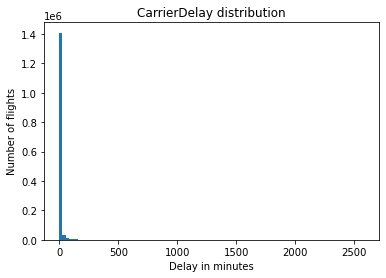

In [60]:
#CarrierDelay
feature_plot('CarrierDelay')

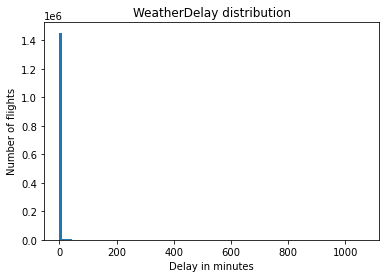

In [61]:
#WeatherDelay
feature_plot('WeatherDelay')

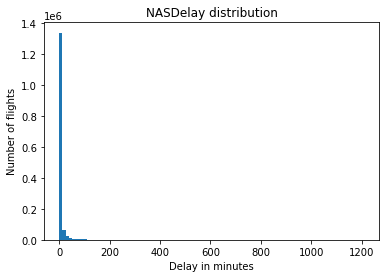

In [62]:
# NASDelay
feature_plot('NASDelay')

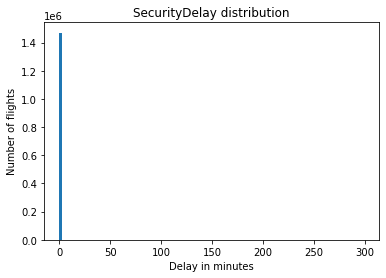

In [63]:
# SecurityDelay
feature_plot('SecurityDelay')

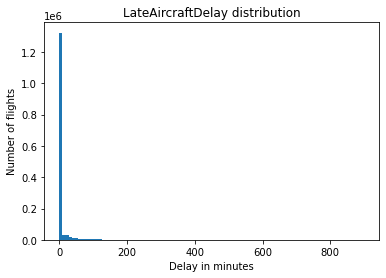

In [64]:
# LateAircraftDelay
feature_plot('LateAircraftDelay')

#### Observation: 
> all previous features are similar, almost all kind are not long (couple of minutes), just in special cases where they could take a longer time ( couple of hours maybe ) 

#### Question

How long do flights take to park or to take-off 

#### Visualization

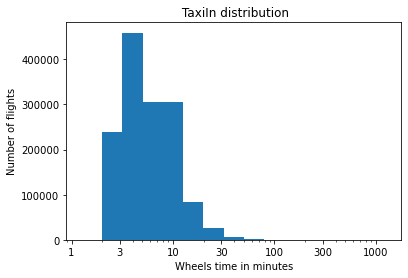

In [65]:
#TaxiIn
bins = 10 ** np.arange(0.1, 3+0.2, 0.2)
ticks = [1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=flights, x='TaxiIn', bins=bins)
plt.title(' TaxiIn distribution')
plt.xlabel('Wheels time in minutes')
plt.ylabel('Number of flights')
plt.xscale('log')
plt.xticks(ticks, labels)
plt.show()

#### Observation: 
> Normal distribution, almost all flights take from 2 min to 1 hour to park

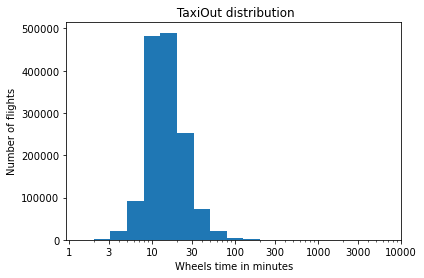

In [66]:
#TaxiOut
bins = 10 ** np.arange(0.1, 2.6+0.2, 0.2)
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=flights, x='TaxiOut', bins=bins)
plt.title(' TaxiOut distribution')
plt.xlabel('Wheels time in minutes')
plt.ylabel('Number of flights')
plt.xscale('log')
plt.xticks(ticks, labels)
plt.show()

#### Observation: 
> Normal distribution, almost all flights take from 3 min to 1.5 hour to take off

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

**ActuaElapsedTime and CRSElapsedTime** : 
- ActuaElapsedTime feature : Normal distribution, Most flights take between 30-300 minutes (hald an hour to 5 hours) to arrive to their destination with a few outliers, these outliers were acceptable because most of them were long flights ( long distance ) where CVG, LAN flight and LAX, HNL are the top two long flights, because of these outliers I had to perform a logarithmic transformation on the x-axis ( ActualElapsedTime values ) to get a good plot.

- CRSElapsedTime : I had to clean some inaccurate values (negative values) before moving any further, for the histogram it was unimodel with a few outliers, pretty much the same distribution as ActuaElapsedTime where scaled x-axis with log to get to a good visualization.After observing the visualization, I had to drop some outliers with inaccurate CRSElapsedTime values. 

**ArrDelay/Depdelay** :
- ArrDelay : Only 2.74% of the flights arrive in time which indicates that flights rarely arrive exactly in time, where the number of flights with early arrival is slightly higher than flights with late arrival.

- Depdelay : Only 8.41% of the flights leave in time which indicates that flights rarely leave in time, where the number of flights with early departure is slightly higher than flights with late departure.

**Cancelled/Diverted** : 
- Cancelled : Only 2% of flights were cancelled
- Diverted ; Only 0.23% of flights were diverted

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

**Flight date/time** : 
- Flight month : The most prefered months to travel are July and August which was expectable, because people tend to travel a lot during summer vacation.

- Flight day : Number of flights decreases at the end of the month (from 29th to 31th), which means that people travel less at this period

- Flight day of the week : High number of flights during the weekend

- Departure Time : Most flights take-off from 6am to 7pm (during the day)

- Arrival time : Most flights land/Arrive from 6am to midnight

**Distance** :  most distances are between 100-3000 miles, and a relatively small number of flights (2214) with a distance greater than 3000 miles

## Bivariate Exploration

#### Question
What's the relationship between the Departure delay and Arrival delay ?

#### Visualization

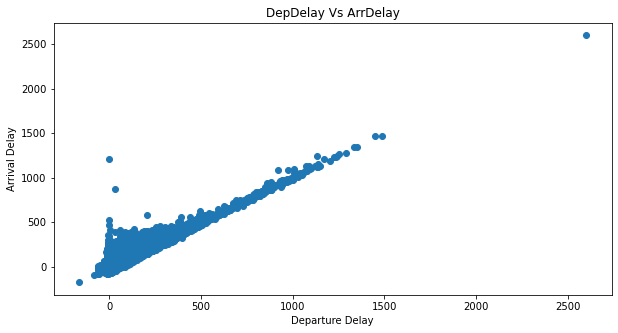

In [67]:
plt.figure(figsize=(10, 5))
plt.scatter(data=flights, x='DepDelay', y='ArrDelay')
plt.title('DepDelay Vs ArrDelay')
plt.xlabel('Departure Delay')
plt.ylabel('Arrival Delay')
plt.show()

#### Observation

> There's a correlation between the Deparure and Arrival delays, in almost all flights, the longer the departure delay is the long there will be an arrival delay. notice that there's one outlier point that we must check

In [68]:
flights.query('ArrDelay > 2500')

Date  DayOfWeek UniqueCarrier  FlightNum TailNum Origin Dest  \
423190 2007-10-03  Wednesday            NW        891  N329NW    PBI  DTW   

        Distance   DepTime CRSDepTime   ArrTime CRSArrTime  ActualElapsedTime  \
423190      1087  08:20:00   12:59:00  11:09:00   15:51:00              169.0   

        CRSElapsedTime  AirTime  ArrDelay  DepDelay  TaxiIn  TaxiOut Diverted  \
423190           172.0    145.0    2598.0    2601.0       3       21       No   

       Cancelled CancellationCode  CarrierDelay  WeatherDelay  NASDelay  \
423190        No              NaN          2580             0         0   

        SecurityDelay  LateAircraftDelay  
423190              0                 18

In [69]:
flights.Distance.max()

4962

> This flight delay is more than 2500 minutes because of a carrier delay. even though this row is considered as an outlier I won't drop it, beacuse I will need the delay values and causes when doing my analysis on the delay related features

#### Quesion
What are the most dar destination the people often travel to ?

#### Visualization

In [70]:
most_far_dest = flights.groupby('Dest')['Distance'].mean().sort_values(ascending=False).head(10)

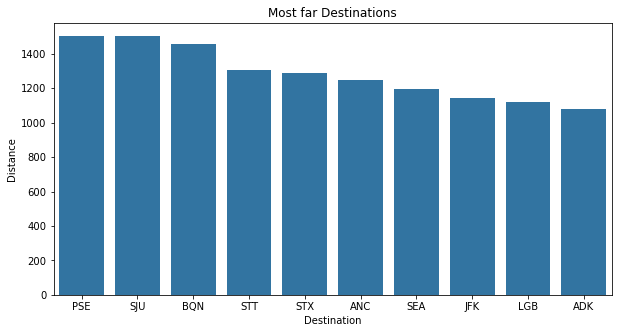

In [71]:
plt.figure(figsize=(10, 5))
sb.barplot(x=most_far_dest.index, y=most_far_dest, color=base_color)
plt.title('Most far Destinations')
plt.xlabel('Destination')
plt.ylabel('Distance')
plt.show()

#### Observation

> Airports/cities such us PSE, SJU, BQN are considered one of the most far distances that people travel to

#### Quesion
What are the most close destination the people often travel to ?

#### Visualization

In [72]:
closest_dest = flights.groupby('Dest')['Distance'].mean().sort_values().head(10)
closest_dest = closest_dest.sort_values(ascending=False)

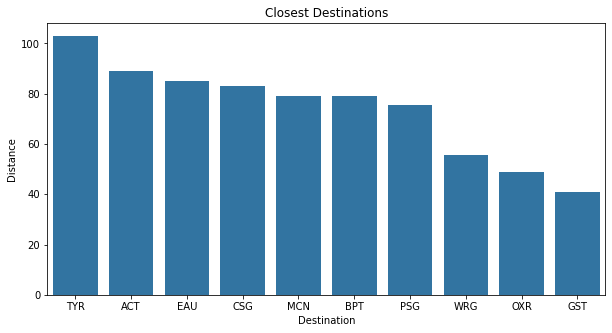

In [73]:
plt.figure(figsize=(10, 5))
sb.barplot(x=closest_dest.index, y=closest_dest, color=base_color)
plt.title('Closest Destinations')
plt.xlabel('Destination')
plt.ylabel('Distance')
plt.show()

#### Observation

> Airports/citites such as TYR, ACT, EAU are considered one of the closest destinations that people do actually bother to travel to on place

#### Quesion

#### Visualization

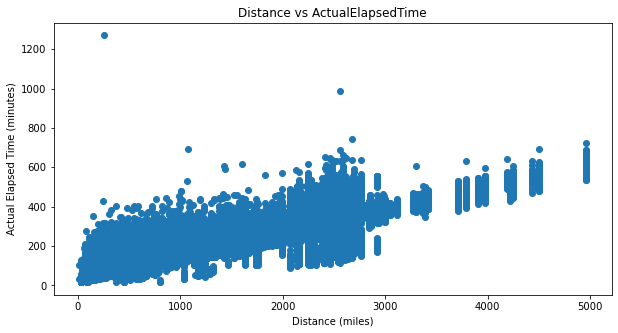

In [74]:
plt.figure(figsize=(10, 5))
plt.scatter(data=flights, x='Distance', y='ActualElapsedTime')
plt.title('Distance vs ActualElapsedTime')
plt.xlabel('Distance (miles)')
plt.ylabel('Actual Elapsed Time (minutes)')
plt.show()

#### Observation

> Notice a correlation between the distance and the Actual Elapsed Time, the longer the distance the longer time the fight will take to reach its destination, which makes sence. however there's two flights with a very short distance that took a very long time to reach their destinations, these flights must be observed.

In [75]:
flights.query('ActualElapsedTime > 800')

Date DayOfWeek UniqueCarrier  FlightNum TailNum Origin Dest  \
1172615 2007-01-26    Friday            OH       5640  N510CA    CVG  LAN   
1221604 2007-05-08   Tuesday            HA          1  N593HA    LAX  HNL   

         Distance   DepTime CRSDepTime   ArrTime CRSArrTime  \
1172615       258  20:56:00   20:56:00  18:06:00   21:57:00   
1221604      2556  08:57:00   08:25:00  01:26:00   10:55:00   

         ActualElapsedTime  CRSElapsedTime  AirTime  ArrDelay  DepDelay  \
1172615             1270.0            61.0   1257.0    1209.0       0.0   
1221604              989.0           150.0    966.0     871.0      32.0   

         TaxiIn  TaxiOut Diverted Cancelled CancellationCode  CarrierDelay  \
1172615       3       10       No        No              NaN             0   
1221604       5       18       No        No              NaN           853   

         WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  
1172615             0      1209              0                  0  
1221604             0         0              0                 18

> As was expected these flights took al this time to reach their destinations because of some long delays before and during the flight.

#### Quesion
What carriers often take over long/short flights ?

#### Visualization

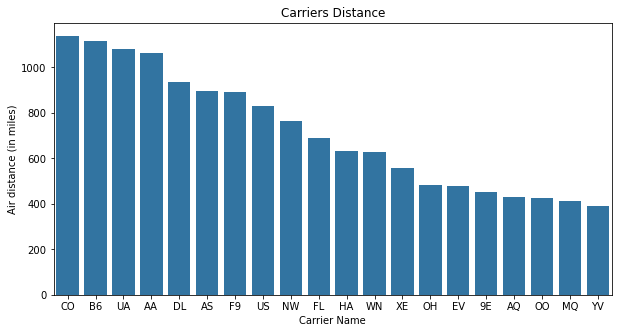

In [76]:
plt.figure(figsize=(10, 5))
carrier_distance = flights.groupby('UniqueCarrier')['Distance'].mean().sort_values(ascending=False)
sb.barplot(x=carrier_distance.index, y=carrier_distance, color=base_color)
plt.title('Carriers Distance')
plt.xlabel('Carrier Name')
plt.ylabel('Air distance (in miles)')
plt.show()

> CO, B6, UA and AA carriers usualy handle long distance flights, on the other hand carrriers such as AQ, OO, MQ, YV handle short distance flights

#### Quesion
What are the best/worst carrier in a matter of flight delay ?

#### Visualization

In [77]:
flights['delay'] = flights['CarrierDelay'] + flights['WeatherDelay'] + flights['NASDelay'] + flights['SecurityDelay'] + flights['LateAircraftDelay']

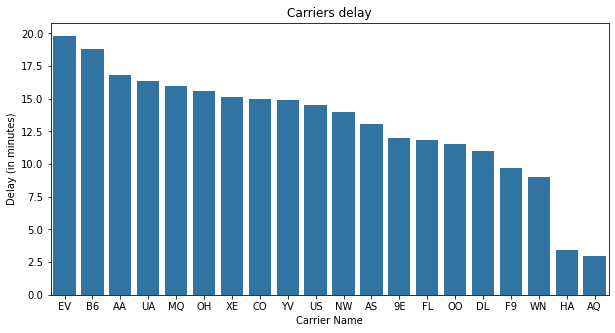

In [78]:
plt.figure(figsize=(10, 5))
carrier_delay = flights.groupby('UniqueCarrier')['delay'].mean().sort_values(ascending=False)
sb.barplot(x=carrier_delay.index, y=carrier_delay, color=base_color)
plt.title('Carriers delay')
plt.xlabel('Carrier Name')
plt.ylabel('Delay (in minutes)')
plt.show()

#### Observation

> Carriers with the longest average delay per flight are : EV, B6 these carriers are considered the worst because they are always 15-20 minutes behind schedule, on the other hand the best carriers are HA and AQ where they only have an average delay time of about 3 minutes only per flight

#### Quesion

 What carriers has the most/least flights cancellation ratio ?
 

#### Visualization

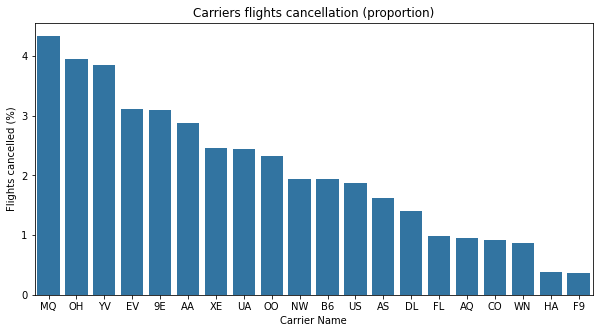

In [79]:
canelled_carrier_flight = flights.query('Cancelled == "Yes"').groupby('UniqueCarrier').size()
carrier_flight_number = flights.groupby('UniqueCarrier').size()[canelled_carrier_flight.index]
carrier_flight_canellation = (canelled_carrier_flight / carrier_flight_number) * 100
carrier_flight_canellation = carrier_flight_canellation.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sb.barplot(x=carrier_flight_canellation.index, y=carrier_flight_canellation, color=base_color)
plt.title('Carriers flights cancellation (proportion)')
plt.xlabel('Carrier Name')
plt.ylabel('Flights cancelled (%)')
plt.show()

#### Observation

> Carriers with the highest flights cancelation ratio are : MQ, OH, YV where almost 4% of their intire flights were cancelled. On the other hand carriers such as HA, F9 have the lowest cancellation ratio with less than 0.5% of their flights not beeing cancelled.

#### Quesion

 What carriers has the most/least flights divertion ratio ?
 

#### Visualization

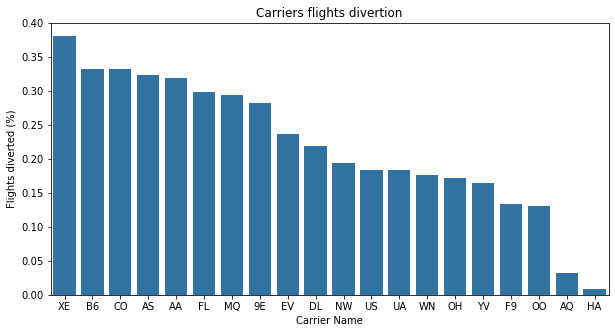

In [80]:
Diverted_carrier_flight = flights.query('Diverted == "Yes"').groupby('UniqueCarrier').size()
carrier_flight_number = flights.groupby('UniqueCarrier').size()[Diverted_carrier_flight.index]
carrier_flight_divertion = (Diverted_carrier_flight / carrier_flight_number) * 100
carrier_flight_divertion = carrier_flight_divertion.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sb.barplot(x=carrier_flight_divertion.index, y=carrier_flight_divertion, color=base_color)
plt.title('Carriers flights divertion')
plt.xlabel('Carrier Name')
plt.ylabel('Flights diverted (%)')
plt.show()

#### Observation
> Carriers with the highest flights divertion ratio are : XE, B6, CO where about 0.35% of their intire flights were diverted. On the other hand carriers such as AQ, HA have the lowest flights divertion ratio with less than 0.05% of their flights not beeing diverted.

#### Quesion

What are the reasons behind cancelling the flights for each carrier ?

#### Visualization

In [81]:
temp_df = pd.DataFrame(flights.groupby(['UniqueCarrier', 'CancellationCode']).size())
temp_df.rename(columns={0: 'count'},
          inplace=True, errors='raise')
temp_df.reset_index(inplace=True)
fig = px.bar(temp_df, x="UniqueCarrier", y="count", color="CancellationCode", title="UniqueCarrier flights cancellation reasons")
fig.show()


#### Observation

> Almost all carriers cancel their flights for two main reasons : Carrier issues and weather conditions, where cancellations because of NAS (National Aviation System). cancellation because of security reasons rarely happens.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

**DepDelay and ArrDelay** :
- the longer the departure delay is the long there will be an arrival delay

**Dest and Distance** :
- Airports/cities such us PSE, SJU, BQN are considered one of the most far distances that people travel to
- Airports/citites such as TYR, ACT, EAU are considered one of the closest destinations that people do actually bother to travel to on place

**Distance and ActualElapsedTime** :
- the longer the distance the longer time the fight will take to reach its destination

**UniqueCarrier and Distance** :
- CO, B6, UA and AA carriers usualy handle long distance flights, on the other hand carrriers such as AQ, OO, MQ, YV handle short distance flights

**UniqueCarrier and Delay features** :
- Carriers with the highest average delay per flight are : EV and B6
- Carriers with the lowest average delay per flight are : HA and AQ

**UniqueCarrier and Cancelled** :
- Carriers with the highest flights cancelation ratio are : MQ, OH, YV
- Carriers with the highest flights cancelation ratio are : HA, F9 

**UniqueCarrier and Diverted** :
- Carriers with the highest flights divertion ratio are : XE, B6, CO
- Carriers with the highest flights divertion ratio are : AQ, HA 

**UniqueCarrier and Cancellation code** :
- Almost all carriers cancel their flights for two main reasons : Carrier issues and weather conditions, where cancellations because of NAS (National Aviation System). cancellation because of security reasons rarely happens

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> **I didn't perform any bivariate visualizations on these features**

## Multivariate Exploration


In [82]:
flights.columns

Index(['Date', 'DayOfWeek', 'UniqueCarrier', 'FlightNum', 'TailNum', 'Origin',
       'Dest', 'Distance', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'TaxiIn', 'TaxiOut', 'Diverted', 'Cancelled',
       'CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay', 'delay'],
      dtype='object')

#### Quesion

What is the relationship between the distance and the mean delay time for each carrier ?

#### Visualization

In [83]:
temp_df = pd.DataFrame(flights.groupby('UniqueCarrier')['FlightNum'].count())
temp_df.reset_index(inplace=True)
temp_df.rename(columns={'FlightNum': 'Number_of_flights'},
          inplace=True, errors='raise')
temp_df

UniqueCarrier  Number_of_flights
0             9E              50997
1             AA             124875
2             AQ               9325
3             AS              31503
4             B6              37593
5             CO              63504
6             DL              94040
7             EV              56170
8             F9              19455
9             FL              51897
10            HA              10985
11            MQ             106788
12            NW              81677
13            OH              45895
14            OO             117980
15            UA              97405
16            US              96102
17            WN             231076
18            XE              85755
19            YV              58471

In [84]:
temp_df2 = flights.groupby('UniqueCarrier').mean().sort_values(by='delay', ascending=False)
temp_df2.reset_index(inplace=True)

In [85]:
temp_df3 = temp_df2.merge(temp_df, on='UniqueCarrier')

In [86]:
temp_df3

UniqueCarrier    FlightNum     Distance  ActualElapsedTime  CRSElapsedTime  \
0             EV  4513.229108   476.609525          97.173868      100.403383   
1             B6   531.003538  1114.675418         181.234976      182.419200   
2             AA  1242.624488  1062.614799         167.268608      167.229878   
3             UA   719.675663  1082.023962         169.790570      170.495673   
4             MQ  3937.584991   414.495430          90.813393       90.803339   
5             OH  5306.808193   481.764811         106.788193      106.391132   
6             XE  2502.627602   556.889021         110.595984      112.367795   
7             CO   946.161722  1138.822137         184.517000      185.823491   
8             YV  4923.535359   392.434643          87.389075       88.729062   
9             US  1034.023517   830.117750         141.788715      141.846871   
10            NW   885.775151   766.378711         137.120480      133.079582   
11            AS   334.630480   898.161572         145.600486      146.429896   
12            9E  4782.213248   452.081436          97.784153       98.827365   
13            FL   479.571420   691.929206         121.914188      122.989845   
14            OO  5345.379683   424.985845          90.518353       89.787083   
15            DL  1108.706157   937.977159         156.179617      156.490440   
16            F9   519.154767   894.223233         144.355220      144.373805   
17            WN  1267.390071   628.202410         105.140381      110.014086   
18            HA   219.958853   633.520528          97.509596       96.739645   
19            AQ   210.643646   428.240214          73.818064       75.667775   

       AirTime   ArrDelay   DepDelay    TaxiIn    TaxiOut  CarrierDelay  \
0    73.215604  17.287306  20.375310  7.609133  15.578494      9.836301   
1   151.726375  13.610615  14.945884  6.309765  22.615407      2.974889   
2   142.186641  14.062296  14.425335  7.734559  16.609898      4.172228   
3   144.859807  12.690610  13.887001  6.518136  17.801396      3.829454   
4    67.689243  13.258628  13.462569  6.662809  15.453188      3.757342   
5    79.399255  13.227714  12.606338  6.500381  19.802549      6.141824   
6    85.275033  10.053192  11.859542  7.098898  17.583966      2.872287   
7   153.849982  10.399930  11.855842  7.771180  22.595175      2.731481   
8    64.129383  11.473347  12.776341  6.579398  15.782644      6.299413   
9   116.563705  11.772939  12.209054  6.491488  18.262991      4.169518   
10  108.840823  12.472939   8.815430  8.453212  19.264591      5.423302   
11  124.874587   9.202201  10.629098  5.629083  14.743612      4.455925   
12   71.253740   8.068377   9.122837  8.124184  17.570504      4.213542   
13   99.538983   7.872726   9.002549  7.823227  14.317417      1.846658   
14   68.682083   8.832560   8.301721  5.918851  15.406289      4.631175   
15  127.608016   7.398178   7.964141  8.259751  19.903084      3.204541   
16  122.323449   7.532934   7.554764  7.626163  14.317245      2.846723   
17   89.957940   5.491946  10.471498  4.563624  10.481067      1.811395   
18   82.612959  -0.257448  -0.756465  5.323168   9.516431      2.348384   
19   62.106021  -1.552956   0.302263  3.703592   7.896086      1.661769   

    WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay      delay  \
0       2.789122  3.856507       0.018960           3.307068  19.807958   
1       0.509696  7.671455       0.032559           7.650919  18.839518   
2       1.211972  5.075179       0.011508           6.311247  16.782134   
3       0.442092  4.543904       0.001489           7.540794  16.357733   
4       1.085431  4.336658       0.003465           6.787036  15.969931   
5       3.425362  5.214860       0.008323           0.830962  15.621331   
6       0.687808  5.679937       0.023427           5.870503  15.133963   
7       0.664840  6.900054       0.048091           4.611599  14.956066   
8       0.574849  2.369345       0.041662         

In [87]:
fig = px.scatter(temp_df3, x=temp_df3.UniqueCarrier, y=temp_df3.Distance, size="delay", color="delay",
                 hover_name="UniqueflightsCarrier", hover_data=["Number_of_flights", "ArrDelay", "DepDelay", "WeatherDelay","NASDelay"
                                                         ,"SecurityDelay","LateAircraftDelay"],size_max=50, 
                labels={
                     "UniqueCarrier": "Carrier name",
                     "Distance": "Distance (in miles)", 
                     "delay": "Delay (in minutes)"},
                title="Carriers flights delay per distance")
fig.show()

#### Observation

> I noticed that there isn't really a relationship between the distance and the delay, where this latter depends on the carrier, in other words how the carrier planes and stuff deal with long/medium/short distances. Where carriers such as EV and B6 always suffer from long delays during its flights (mean of 18-19min per flight)  whether the long or short which indicates that these carriers are having problems managing their flights, there carriers are considered the worst carriers in matter of delay time.

> however carriers such as HA and AQ often handle short distance flights (max 600 miles long ) where these carriers makes sure that their flights aways take off and arrive in time. These carriers are happen to be the best choice for short distance flights where they're doing a good job handeling short distance flights.

> For the rest of the carriers we can see that each carrier handle a perticular type of flights, where some carriers usually handle long distance flights and other carriers handle short distance flights. these carriers are doing an acceptable job handling and managing their flights (mean delay time per flight is 12-16 min)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Some carriers usually handle long distance flights, where other carriers handle short distance flights, so there's a relation between the distance and the carrier, however the delay time depends on how does each carrier manage its flights.

### Were there any interesting or surprising interactions between features?

> Yes, some carriers are specialised in a particulare type of flights (short/medium/long) these carriers are doing a fine job handling this type of flights, however other carriers seems to have some probems managing all their flights in general, where they always suffer from delays. On the other hand carriers that handle various type of flights seems to have an acceptable average deley time per carrier

## Conclusions
> During this analysis, I managed to fogured out when do people often travel and What flights are more likely to be cancelled or delayed and the reasons behind this cancellation, and how well the carriers are handling and managing their flights. And these are some main fondings ?

**About the passengers and airports**
- people are more likely to travel during the weekend, but they avoid traveling at the end of the month, also they travel a lot during the months of July and August
- Airports/cities such us PSE, SJU, BQN are considered one of the most far distances that people travel to, and TYR, ACT, EAU are considered one of the closest destinations that people do actually bother to travel to on place
- Atlanta, Chocago, Dallas are the most three active air traffic cities (airports) in our records


**About the flights**
- Most flights take off from 6am to 7am and arrive at 6am to midnight
- Most distances are between 100-3000 miles
- Most flights take between 30-300 minutes (half an hour to 5 hours) to arrive to their destination, with an air time less than 200 minutes (3.5 hours)
- Early arrival flights tend to arrive 5-30 minutes earlier than the Scheduled arrival time, and late arrival flights tend to arrive 5-300 minutes late than the Scheduled arrival time. Where Only 2.74% of the flights arrive in time which indicates that flights rarely arrive exactly in time, where the number of flights with early arrival is slightly higher than flights with late arrival, because the number of flights that leave early is slightly higher than the number of flights that leave late
- Only 2.17% of the flights were cancelled and only 0.23% of the flights were diverted
- Almost all cancellation are bacause of the weather conditions or the carrier, around only 6000 cancellations are a result of National Aviation System situation, where only 7 fights were cancelled because of security reasons.

**About carriers**
- WN (Southwest Airlines) dominates the market, where it covers 16% of it, x2 ahead from its best competitor which is The American Airlines.
- Carriers with the highest flights cancelation ratio are : MQ, OH, YV where almost 4% of their intire flights were cancelled. On the other hand carriers such as HA, F9 have the lowest cancellation ratio with less than 0.5% of their flights not beeing cancelled.
- Carriers with the highest flights divertion ratio are : XE, B6, CO where about 0.35% of their intire flights were diverted. On the other hand carriers such as AQ, HA have the lowest flights divertion ratio with less than 0.05% of their flights not beeing diverted.
- Carriers with the highest flights divertion ratio are : XE, B6, CO where about 0.35% of their intire flights were diverted. On the other hand carriers such as AQ, HA have the lowest flights divertion ratio with less than 0.05% of their flights not beeing diverted.
- Where carriers such as EV and B6 always suffer from long delays during its flights (mean of 18-19min per flight) whether the long or short which indicates that these carriers are having problems managing their flights, there carriers are considered the worst carriers in matter of delay time.
- Carriers such as HA and AQ often handle short distance flights (max 600 miles long ) where these carriers makes sure that their flights aways take off and arrive in time. These carriers are happen to be the best choice for short distance flights where they're doing a good job handeling short distance flights.